## Generación de dataset

### Importar librerias generales

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline 

#### Establecemos los path de los data set a utilizar

In [2]:
path_dataset_base = "Dataset_benigno_ransomware/Dataset01.csv"

#### Cargamos el dataset base

In [3]:
data_base = pd.read_csv(path_dataset_base)

### INFORMACIÓN COLUMNAS

|ID| Característica #  | Descripción    | 
|---:|:-------------|:-----------|
| 1 | Flow duration  | Duración de flujos en microsegundos       | 
| 2 | flowBytesPerSecond  | Número de flujos de bytes por segundo    |
| 3 | total opackets  | Total de Paquetes en al dirección de salida    |
| 4 |  total ipackets  |  Total de paquetes en dirección de entrada    |
| 5 | min opktl  | Tamaño mínimo de paquetes con dirección de salida    |
| 6 | max opktl  | Máximo tamaño del paquete con dirección de salida   |
| 7 | mean opktl  | Tamaño Medio del paquete con dirección de salida   |
| 8 | std opktl  | Número de flujos de bytes por segundo    |
| 9 | min ipktl  | Mínimo tamaño de paquete con dirección de entrada    |
| 10 | max ipktl  | Tamaño máximo de paquete con dirección de entrada    |
| 11 | mean ipktl   | Tamaño Medio del paquete con dirección de entrada    |
| 12 | std ipktl  | Desviación estándar de paquetes con dirección de entrada   |
| 13 | min flowpktl  | Mínimo tamaño de un flujo    |
| 14 | max flowpktl  | Máximo tamaño de un flujo    |
| 15 | mean flowpktl  | Media del tamaño de un flujo    |


#### Información general del dataset original

In [4]:
data_base.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Label
0,13,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.0,21.897488,153846.1538,1.040000e+07,Benigno
1,15,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.0,21.897488,133333.3333,9.000000e+06,Benigno
2,14,0,2,0,111,-1,40.0,-1,71,0.0,55.5,0.0,21.897488,142857.1429,7.928571e+06,Benigno
3,0,0,1,0,83,-1,83.0,-1,83,0.0,83.0,0.0,0.000000,0.0000,0.000000e+00,Benigno
4,13,0,2,0,159,-1,52.0,-1,107,0.0,79.5,0.0,38.878014,153846.1538,1.220000e+07,Benigno


In [5]:
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212795 entries, 0 to 212794
Data columns (total 16 columns):
Flow Duration       212795 non-null int64
Tot Fwd Pkts        212795 non-null int64
Tot Bwd Pkts        212795 non-null int64
TotLen Fwd Pkts     212795 non-null int64
TotLen Bwd Pkts     212795 non-null int64
Fwd Pkt Len Min     212795 non-null int64
Bwd Pkt Len Min     212795 non-null float64
Fwd Pkt Len Max     212795 non-null int64
Bwd Pkt Len Max     212795 non-null int64
Fwd Pkt Len Mean    212795 non-null float64
Bwd Pkt Len Mean    212795 non-null float64
Fwd Pkt Len Std     212795 non-null float64
Bwd Pkt Len Std     212795 non-null float64
Flow Pkts/s         212795 non-null float64
Flow Byts/s         212795 non-null float64
Label               212795 non-null object
dtypes: float64(7), int64(8), object(1)
memory usage: 26.0+ MB


In [6]:
data_base.shape

(212795, 16)

In [7]:
data_base['Label'].unique()

array(['Benigno', 'Ransomware'], dtype=object)

### Se observa que la columna 'Label', es de tipo string.

### Por tal razón. se generarán con conjunto de nuevas columnas para representará el valor de la columna 'Label' de forma binaria, de la siguiente forma:


#### Ransomware = 0
#### Beningo = 1

In [8]:
ransomware_value = 0
beningo_value = 1

In [9]:
def binary_label(x):
    return beningo_value if(x == 'Benigno') else ransomware_value

In [10]:
def matrix_binary_label(x, name):
    if(x == name):
        return beningo_value
    else:
        return ransomware_value

In [11]:
data_base['binaryLabel']=data_base['Label'].apply(binary_label)

In [12]:
data_base['benignoLabel']=data_base['Label'].apply(matrix_binary_label, name='Benigno')

In [13]:
data_base['ransomwareLabel']=data_base['Label'].apply(matrix_binary_label, name='Ransomware')

### Con esto ya poseemos las columnas transformadas a formato binario, y separadas en nuevas columnas para el futuro entrenamiento de los modelos.

### Continuaremos con un analisis exploratorio de los datos

In [18]:
data_base.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Label,binaryLabel,benignoLabel,ransomwareLabel
0,13,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.0,21.897488,153846.1538,1.040000e+07,Benigno,1,1,0
1,15,0,2,0,135,-1,52.0,-1,83,0.0,67.5,0.0,21.897488,133333.3333,9.000000e+06,Benigno,1,1,0
2,14,0,2,0,111,-1,40.0,-1,71,0.0,55.5,0.0,21.897488,142857.1429,7.928571e+06,Benigno,1,1,0
3,0,0,1,0,83,-1,83.0,-1,83,0.0,83.0,0.0,0.000000,0.0000,0.000000e+00,Benigno,1,1,0
4,13,0,2,0,159,-1,52.0,-1,107,0.0,79.5,0.0,38.878014,153846.1538,1.220000e+07,Benigno,1,1,0


In [14]:
data_base.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,binaryLabel,benignoLabel,ransomwareLabel
count,2.127950e+05,2.127950e+05,212795.000000,2.127950e+05,2.127950e+05,212795.000000,212795.000000,212795.000000,212795.000000,212795.000000,212795.000000,212795.000000,212795.000000,2.127950e+05,2.127950e+05,212795.000000,212795.000000,212795.000000
mean,2.422540e+07,2.043308e+04,5.810146,1.085226e+03,9.085128e+03,238.715280,45.956728,259.632703,192.447562,163.740223,110.319757,58.171107,65.224459,3.329488e+04,1.752033e+06,0.648074,0.648074,0.351926
std,1.801012e+08,1.687524e+06,172.177682,2.736665e+04,2.513910e+05,359.060019,91.031050,301.277188,378.868557,158.776634,212.217955,130.460713,160.771440,1.699153e+05,9.293515e+06,0.477572,0.477572,0.477572
min,-1.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,1.000000e+00,0.000000,1.040000e+02,0.000000e+00,52.000000,-1.000000,52.000000,-1.000000,52.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,3.351200e+04,2.000000e+00,1.000000,4.200000e+02,1.640000e+02,114.000000,-1.000000,83.000000,-1.000000,70.000000,0.000000,0.000000,0.000000,5.528303e-01,7.002158e+01,1.000000,1.000000,0.000000
75%,3.316564e+06,1.000000e+01,4.000000,1.469000e+03,8.720000e+03,420.000000,52.000000,420.000000,176.000000,297.000000,106.200000,19.065676,1.000000,6.013772e+01,6.232552e+03,1.000000,1.000000,1.000000
max,1.154108e+10,2.630639e+08,53758.000000,1.220839e+07,7.463559e+07,126552.000000,1390.000000,1500.000000,1390.000000,1390.000000,1390.000000,954.593631,946.108345,2.000000e+06,7.440000e+08,1.000000,1.000000,1.000000


In [15]:
print('cantidad de columnas ' + str(len(data_base.columns)))

cantidad de columnas 19


##### Vemos la correlacion de las variables

In [16]:
data_base.corr()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,binaryLabel,benignoLabel,ransomwareLabel
Flow Duration,1.000000,-0.000716,0.006230,0.006959,0.006073,0.004475,-0.035321,0.000903,0.032044,-0.045544,0.014324,0.028341,0.039825,-0.002011,-0.003201,-0.063908,-0.063908,0.063908
Tot Fwd Pkts,-0.000716,1.000000,0.000173,-0.000460,-0.000321,0.080409,0.002213,-0.002693,0.000929,-0.003809,-0.000001,-0.001153,0.002340,-0.002327,-0.002219,-0.015334,-0.015334,0.015334
Tot Bwd Pkts,0.006230,0.000173,1.000000,0.179983,0.933032,-0.008401,0.003373,0.020968,0.059122,-0.010896,0.094241,0.008214,0.021124,-0.003752,-0.002629,0.004596,0.004596,-0.004596
TotLen Fwd Pkts,0.006959,-0.000460,0.179983,1.000000,0.123478,0.002232,0.000896,0.026386,0.022584,0.021697,0.022750,0.018101,0.014644,-0.001918,-0.001687,-0.013130,-0.013130,0.013130
TotLen Bwd Pkts,0.006073,-0.000321,0.933032,0.123478,1.000000,-0.001919,0.001957,0.013190,0.048257,-0.014111,0.082515,0.003977,0.013116,-0.001522,-0.000467,-0.010032,-0.010032,0.010032
Fwd Pkt Len Min,0.004475,0.080409,-0.008401,0.002232,-0.001919,1.000000,-0.081856,0.079691,-0.063171,0.200373,-0.066490,-0.030798,-0.045330,-0.026579,-0.026833,-0.230654,-0.230654,0.230654
Bwd Pkt Len Min,-0.035321,0.002213,0.003373,0.000896,0.001957,-0.081856,1.000000,-0.069515,0.260626,-0.187629,0.437099,0.042064,0.030949,-0.041702,-0.037918,-0.035651,-0.035651,0.035651
Fwd Pkt Len Max,0.000903,-0.002693,0.020968,0.026386,0.013190,0.079691,-0.069515,1.000000,0.500764,0.700446,0.354749,0.839363,0.538054,-0.072961,-0.068300,0.037498,0.037498,-0.037498
Bwd Pkt Len Max,0.032044,0.000929,0.059122,0.022584,0.048257,-0.063171,0.260626,0.500764,1.000000,0.024108,0.886523,0.543772,0.934668,-0.040608,-0.038516,-0.072631,-0.072631,0.072631
Fwd Pkt Len Mean,-0.045544,-0.003809,-0.010896,0.021697,-0.014111,0.200373,-0.187629,0.700446,0.024108,1.000000,-0.055893,0.325511,0.088318,-0.101021,-0.094328,0.219957,0.219957,-0.219957


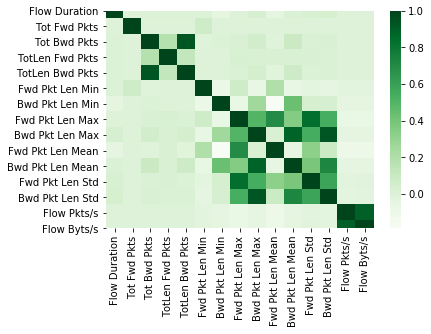

In [17]:
sns.heatmap(data_base.drop(axis=1,inplace=False,columns=['binaryLabel','Label','benignoLabel','ransomwareLabel']).corr(), cmap="Greens")

###### Almacenamos una copia en un archivo CSV de los datos sin balancear

In [22]:
data_base.to_csv(r'Data_Base_NOBALANCEADO.csv', index = False)

##### Proseguimos obteniendo la información asociada a la cantidad de tuplas que son benignos y cuantas son ransomware

In [23]:
data_Benigno = data_base[data_base['Label']=='Benigno']
data_Ransomware = data_base[data_base['Label']!='Benigno']

In [24]:
print('Cantidad de benignos: ' + str(data_Benigno.shape[0]))
print('Cantidad de ransomwares: ' + str(data_Ransomware.shape[0]))

Cantidad de benignos: 137907
Cantidad de ransomwares: 74888


###### [OPCIONAL] Generamos algunos archivos csv, con los datos benignos y ransomware separados pero no balanceados

In [25]:
data_Benigno.to_csv(r'Data_Beningo.csv', index = False)
data_Ransomware.to_csv(r'Data_Ransomware.csv', index = False)

#### Debido a la necesidad de que el nuevo dataset esta balanceado (respecto a la cantidad de cada label), se optará por escoger el mejor de estas cantidades

In [26]:
cantidadBenigno =data_Benigno.shape[0]
cantidadRansomware = data_Ransomware.shape[0]
cantidadBalanceado = cantidadRansomware if(cantidadBenigno > cantidadRansomware) else cantidadBenigno

#### Barajamos el listado elementos

In [27]:
data_Benigno = sklearn.utils.shuffle(data_Benigno)
data_Ransomware = sklearn.utils.shuffle(data_Ransomware)

#### Limitamos ambos dataset barajados en base a la cantidad de balanceo

In [28]:
dataBenignoBalanced = data_Benigno.head(cantidadBalanceado)
dataRansomwareBalanced = data_Ransomware.head(cantidadBalanceado)

#### Unimos ambos dataset y procedemos a barajarla una ultima vez

In [29]:
data_concatenate = pd.concat([dataRansomwareBalanced, dataBenignoBalanced], axis=0)
data_shuffled = sklearn.utils.shuffle(data_concatenate)

In [30]:
data_shuffled.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Min,Bwd Pkt Len Min,Fwd Pkt Len Max,Bwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Pkts/s,Flow Byts/s,Label,binaryLabel,benignoLabel,ransomwareLabel
198530,4220250,11,5,209,17581,605,-1.0,52,-1,52.0,0.0,1.0,0.0,7.938877,1343.257988,Ransomware,0,0,1
128098,0,7,5,2415,16696,321,-1.0,52,-1,52.0,0.0,0.0,0.0,0.000000,0.000000,Ransomware,0,0,1
196510,2,13,4,2264,8590,585,-1.0,40,-1,40.0,0.0,1.0,0.0,0.259702,109.334732,Ransomware,0,0,1
125289,0,22,1,255,21137,293,-1.0,83,-1,83.0,0.0,0.0,0.0,50.404073,18359.851480,Ransomware,0,0,1
161198,0,1,0,420,0,420,-1.0,420,-1,420.0,0.0,0.0,0.0,0.000000,0.000000,Benigno,1,1,0


In [31]:
print('Total Elementos: ' + str(data_shuffled.shape[0]))
print('Total Benigno: ' + str(data_shuffled[data_shuffled['Label']!='Benigno'].shape[0]))
print('Total Ransomware: ' + str(data_shuffled[data_shuffled['Label']!='Benigno'].shape[0]))

Total Elementos: 149776
Total Benigno: 74888
Total Ransomware: 74888


#### Crearemos un nuevo documento csv con el data set ya balanceado y que sera utilizado por lo modelos

In [32]:
data_shuffled.to_csv(r'data_cleaned_balanced.csv', index = False)

###### Finalmente las columnas resultantes del dataset balanceado son

In [33]:
data_shuffled.columns

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Min', 'Bwd Pkt Len Min',
       'Fwd Pkt Len Max', 'Bwd Pkt Len Max', 'Fwd Pkt Len Mean',
       'Bwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Std', 'Flow Pkts/s',
       'Flow Byts/s', 'Label', 'binaryLabel', 'benignoLabel',
       'ransomwareLabel'],
      dtype='object')

****